# Création des données pour apprendre le model sans le mettre dans un fichier csv

In [ ]:
import random

# Define the game board
board = [[0 for _ in range(3)] for _ in range(3)]

# Function to check for a win
def is_winner(board, player):
    for row in board:
        if all([cell == player for cell in row]):
            return True
    for col in range(3):
        if all([board[row][col] == player for row in range(3)]):
            return True
    if all([board[i][i] == player for i in range(3)]) or all([board[i][2-i] == player for i in range(3)]):
        return True
    return False

# Function to generate a random board state
def generate_random_board():
    players = [1, -1]
    for player in players:
        for _ in range(3):
            while True:
                row, col = random.randint(0, 2), random.randint(0, 2)
                if board[row][col] == 0:
                    board[row][col] = player
                    break
    return board

# Function to reset the board
def reset_board():
    global board
    board = [[0 for _ in range(3)] for _ in range(3)]

# Generate configurations
winning_configs = []
losing_configs = []
config_limit = 500

while len(winning_configs) < config_limit or len(losing_configs) < config_limit:
    reset_board()
    board = generate_random_board()
    if is_winner(board, 1) and len(winning_configs) < config_limit:
        winning_configs.append([row[:] for row in board])
    elif is_winner(board, -1) and len(losing_configs) < config_limit:
        losing_configs.append([row[:] for row in board])


# Output configurations to files
def save_configurations(configs, filename):
    with open(filename, 'w') as file:
        for config in configs:
            for row in config:
                file.write(' '.join(map(str, row)) + '\n')
            file.write('\n')

def print_configurations(configs):
    for config in configs:
        for row in config:
            print(' '.join(map(str, row)))
        print()

save_configurations(winning_configs, 'winning_configs.txt')
save_configurations(losing_configs, 'losing_configs.txt')

# Print the configurations to the console
print("Winning Configurations:")
print_configurations(winning_configs)

print("Losing Configurations:")
print_configurations(losing_configs)

Winning Configurations:
-1 0 0
1 1 1
-1 -1 0

1 0 -1
1 -1 0
1 -1 0

1 0 -1
0 1 -1
-1 0 1

0 -1 -1
1 1 1
0 -1 0

0 1 -1
0 1 -1
-1 1 0

1 1 1
0 0 -1
0 -1 -1

1 1 1
-1 0 0
-1 -1 0

1 1 1
0 -1 0
-1 0 -1

1 1 1
-1 0 0
0 -1 -1

1 0 -1
1 -1 0
1 0 -1

0 -1 1
-1 0 1
0 -1 1

1 0 -1
0 1 0
-1 -1 1

-1 0 1
-1 1 0
1 -1 0

0 0 -1
1 1 1
-1 0 -1

0 -1 0
-1 0 -1
1 1 1

-1 -1 1
-1 1 0
1 0 0

-1 0 0
1 1 1
0 -1 -1

0 -1 1
0 -1 1
-1 0 1

0 1 -1
0 1 -1
0 1 -1

0 -1 -1
1 1 1
-1 0 0

1 1 1
-1 0 -1
0 0 -1

1 1 1
-1 0 0
-1 -1 0

0 0 1
0 1 -1
1 -1 -1

0 -1 1
0 1 0
1 -1 -1

-1 1 0
0 1 0
-1 1 -1

0 0 -1
0 -1 -1
1 1 1

1 0 -1
1 0 -1
1 -1 0

0 1 0
-1 1 0
-1 1 -1

1 0 -1
0 1 0
-1 -1 1

-1 0 0
1 1 1
-1 -1 0

-1 0 1
-1 1 0
1 0 -1

1 0 -1
-1 1 -1
0 0 1

-1 0 1
0 0 1
-1 -1 1

-1 0 1
-1 0 1
0 -1 1

1 1 1
-1 0 0
0 -1 -1

-1 1 0
0 1 0
-1 1 -1

0 1 0
-1 1 -1
0 1 -1

-1 0 -1
0 0 -1
1 1 1

0 0 1
0 -1 1
-1 -1 1

1 -1 0
0 1 0
-1 -1 1

-1 -1 0
1 1 1
0 0 -1

0 -1 1
0 1 -1
1 -1 0

0 0 1
-1 0 1
-1 -1 1

-1 0 1
-1 0 1
0 -1 1

1 -1 0
-

# Création des données pour apprendre le model des fichier csv

In [ ]:
import random
import csv

# Define the game board
board = [[0 for _ in range(3)] for _ in range(3)]

# Function to check for a win
def is_winner(board, player):
    for row in board:
        if all([cell == player for cell in row]):
            return True
    for col in range(3):
        if all([board[row][col] == player for row in range(3)]):
            return True
    if all([board[i][i] == player for i in range(3)]) or all([board[i][2-i] == player for i in range(3)]):
        return True
    return False

# Function to generate a random board state with values 1 (white) and 2 (black)
def generate_random_board():
    players = [1, 2]  # White is 1, Black is 2
    for player in players:
        for _ in range(3):  # Place 3 pieces for each player
            while True:
                row, col = random.randint(0, 2), random.randint(0, 2)
                if board[row][col] == 0:  # Check if the cell is empty
                    board[row][col] = player
                    break
    return board

# Function to reset the board
def reset_board():
    global board
    board = [[0 for _ in range(3)] for _ in range(3)]

# Generate configurations
winning_configs = []
losing_configs = []
config_limit = 500

while len(winning_configs) < config_limit or len(losing_configs) < config_limit:
    reset_board()
    board = generate_random_board()

    # Check for winning configurations for white (player 1)
    if is_winner(board, 1) and len(winning_configs) < config_limit:
        winning_configs.append([row[:] for row in board])
    elif not is_winner(board, 1) and not is_winner(board, 2) and len(losing_configs) < config_limit:
        losing_configs.append([row[:] for row in board])

# Save configurations to CSV files with 80%-20% split
def save_configurations_to_csv(configs, main_filename, test_filename, split_ratio=0.8):
    split_index = int(len(configs) * split_ratio)
    main_configs = configs[:split_index]
    test_configs = configs[split_index:]

    def write_configs_to_file(configs, filename):
        with open(filename, 'w', newline='') as file:
            writer = csv.writer(file)
            for config in configs:
                for row in config:
                    writer.writerow(row)
                writer.writerow([])  # Add an empty line to separate configurations

    write_configs_to_file(main_configs, main_filename)
    write_configs_to_file(test_configs, test_filename)

# Save the configurations to CSV files with 80%-20% split
save_configurations_to_csv(winning_configs, 'winning_configs_white.csv', 'winning_configs_white_test.csv')
save_configurations_to_csv(losing_configs, 'losing_configs_white.csv', 'losing_configs_white_test.csv')

print("Configurations have been saved to:")
print("'winning_configs_white.csv' and 'winning_configs_white_test.csv'")
print("'losing_configs_white.csv' and 'losing_configs_white_test.csv'")

# Example of how to load the configurations in another Python program
def load_configurations_from_csv(filename):
    configs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        current_config = []
        for row in reader:
            if row:  # If the row is not empty
                current_config.append(list(map(int, row)))
            else:  # Empty row indicates the end of a configuration
                if current_config:
                    configs.append(current_config)
                    current_config = []
        # Append the last configuration if the file doesn't end with an empty line
        if current_config:
            configs.append(current_config)
    return configs

# Load configurations from the CSV files (example usage)
loaded_winning_main = load_configurations_from_csv('winning_configs_white.csv')
loaded_winning_test = load_configurations_from_csv('winning_configs_white_test.csv')
loaded_losing_main = load_configurations_from_csv('losing_configs_white.csv')
loaded_losing_test = load_configurations_from_csv('losing_configs_white_test.csv')

print("\nExample of loaded winning main configurations:")
for config in loaded_winning_main[:3]:  # Print the first 3 winning main configurations
    for row in config:
        print(row)
    print()

print("\nExample of loaded winning test configurations:")
for config in loaded_winning_test[:2]:  # Print the first 2 winning test configurations
    for row in config:
        print(row)
    print()

print("\nExample of loaded losing main configurations:")
for config in loaded_losing_main[:3]:  # Print the first 3 losing main configurations
    for row in config:
        print(row)
    print()

print("\nExample of loaded losing test configurations:")
for config in loaded_losing_test[:2]:  # Print the first 2 losing test configurations
    for row in config:
        print(row)
    print()

Configurations have been saved to:
'winning_configs_white.csv' and 'winning_configs_white_test.csv'
'losing_configs_white.csv' and 'losing_configs_white_test.csv'

Example of loaded winning main configurations:
[0, 0, 1]
[2, 1, 0]
[1, 2, 2]

[0, 2, 1]
[0, 1, 0]
[1, 2, 2]

[0, 2, 2]
[1, 1, 1]
[0, 0, 2]


Example of loaded winning test configurations:
[1, 0, 0]
[1, 2, 0]
[1, 2, 2]

[0, 2, 0]
[1, 1, 1]
[2, 2, 0]


Example of loaded losing main configurations:
[2, 1, 1]
[0, 0, 2]
[2, 0, 1]

[2, 0, 2]
[1, 1, 0]
[2, 1, 0]

[1, 2, 2]
[1, 2, 1]
[0, 0, 0]


Example of loaded losing test configurations:
[1, 0, 2]
[0, 2, 2]
[1, 1, 0]

[2, 0, 2]
[1, 1, 0]
[0, 1, 2]



# Création et apprentisage d' un model decision tree

Accuracy: 86.25%

Classification Report:
              precision    recall  f1-score   support

 Losing (-1)       0.90      0.81      0.86        80
 Winning (1)       0.83      0.91      0.87        80

    accuracy                           0.86       160
   macro avg       0.87      0.86      0.86       160
weighted avg       0.87      0.86      0.86       160



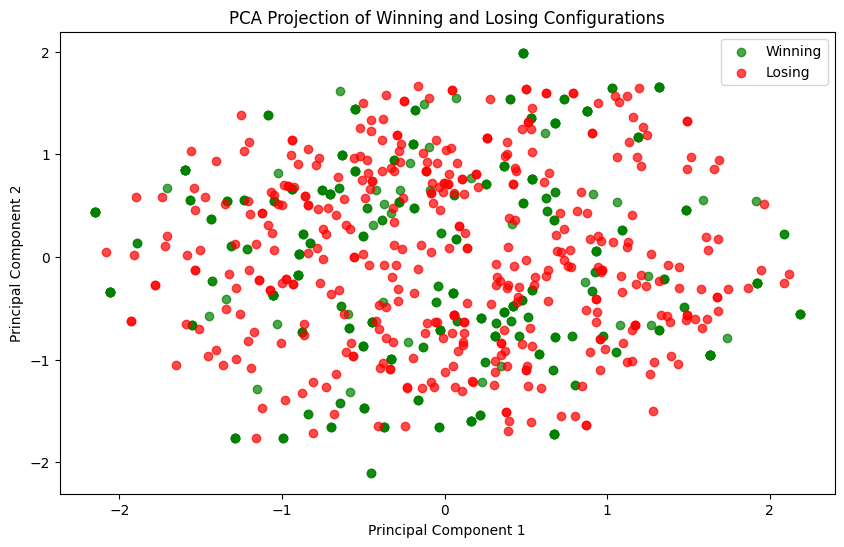

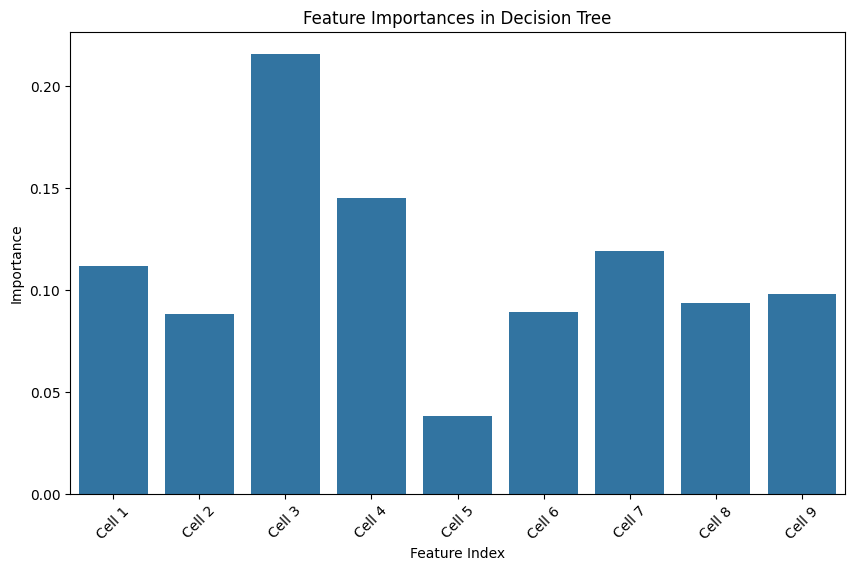

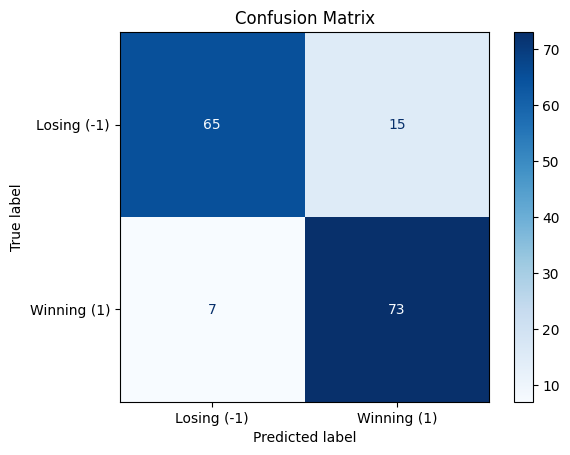

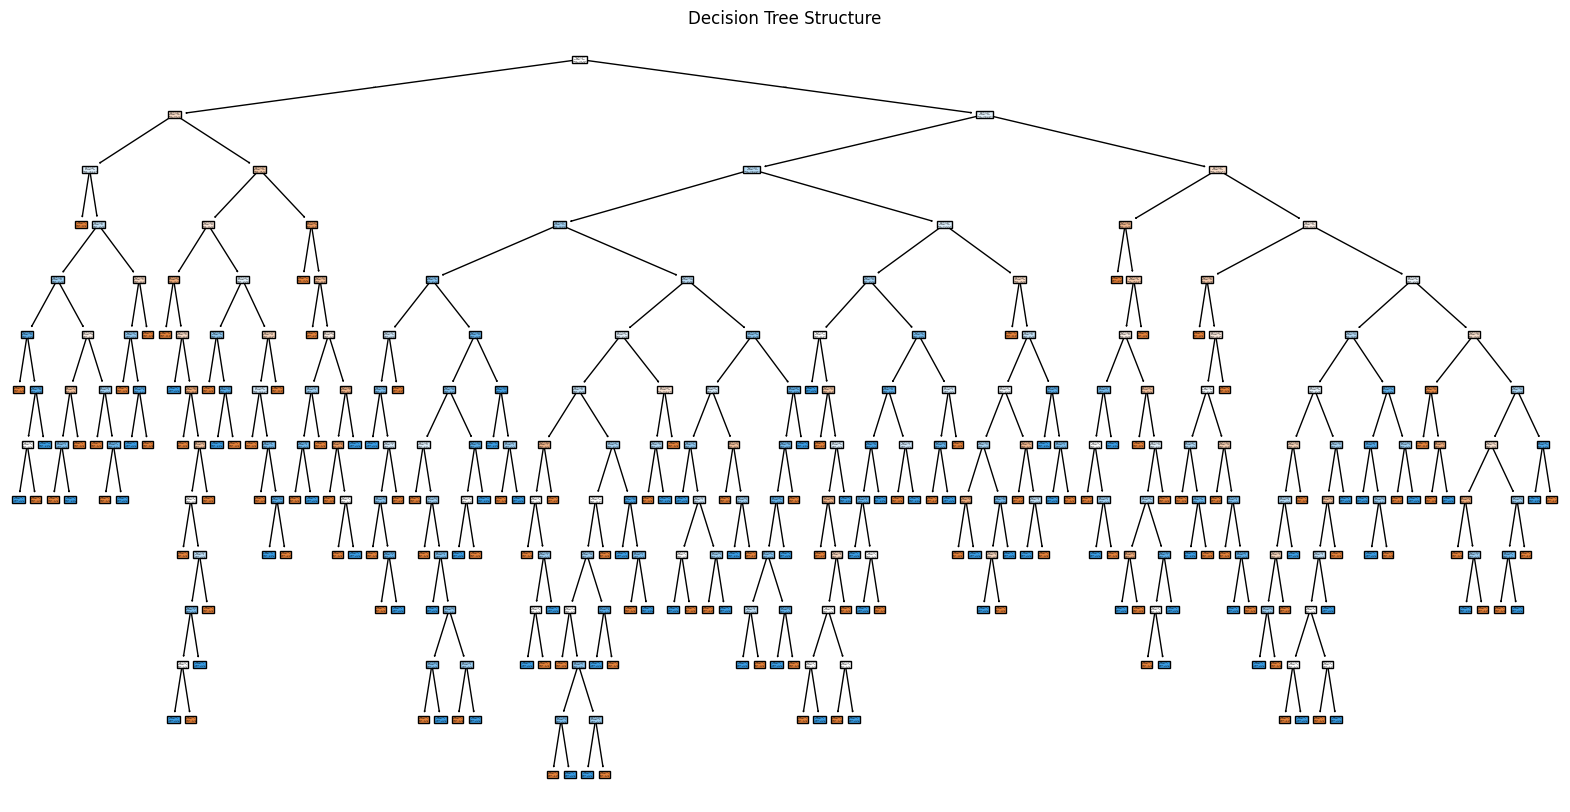


Evaluation of Example Configuration:
[1, 2, 0]
[2, 0, 2]
[0, 1, 1]
Losing Position (White's perspective)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Fonction pour charger les configurations depuis un fichier CSV
def load_configurations_from_csv(filename):
    configs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        current_config = []
        for row in reader:
            if row:  # Si la ligne n'est pas vide
                current_config.append(list(map(int, row)))
            else:  # Ligne vide indique la fin d'une configuration
                if current_config:
                    configs.append(current_config)
                    current_config = []
        # Ajouter la dernière configuration si le fichier ne se termine pas par une ligne vide
        if current_config:
            configs.append(current_config)
    return configs

# Charger les configurations gagnantes et perdantes
winning_configs = load_configurations_from_csv('winning_configs_white.csv')
losing_configs = load_configurations_from_csv('losing_configs_white.csv')

# Convertir les configurations en vecteurs (features) et attribuer les étiquettes
def prepare_data(configs, label):
    features = []
    labels = []
    for config in configs:
        # Aplatir la matrice 3x3 en un vecteur de 9 éléments
        features.append([cell for row in config for cell in row])
        labels.append(label)
    return features, labels

# Préparer les données pour les configurations gagnantes et perdantes
X_win, y_win = prepare_data(winning_configs, 1)  # Étiquette 1 pour les configurations gagnantes
X_lose, y_lose = prepare_data(losing_configs, -1)  # Étiquette -1 pour les configurations perdantes

# Combiner les données gagnantes et perdantes
X = X_win + X_lose
y = y_win + y_lose

# Convertir les listes en tableaux NumPy
X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner un modèle Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Losing (-1)', 'Winning (1)'])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

# 1. Synthetic Data Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='green', label='Winning', alpha=0.7)
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], c='red', label='Losing', alpha=0.7)
plt.title("PCA Projection of Winning and Losing Configurations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 2. Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=range(9), y=feature_importances)
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(ticks=range(9), labels=[f"Cell {i+1}" for i in range(9)], rotation=45)
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Losing (-1)', 'Winning (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 4. Decision Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=[f"Cell {i+1}" for i in range(9)], class_names=['Losing', 'Winning'])
plt.title("Decision Tree Structure")
plt.show()

# Fonction pour évaluer une nouvelle configuration
def evaluate_configuration(config):
    # Aplatir la matrice 3x3 en un vecteur de 9 éléments
    features = np.array([cell for row in config for cell in row]).reshape(1, -1)
    prediction = model.predict(features)
    if prediction == 1:
        return "Winning Position (White's perspective)"
    elif prediction == -1:
        return "Losing Position (White's perspective)"
    else:
        return "Unknown"

# Exemple d'évaluation d'une configuration
example_config = [
    [1, 2, 0],
    [2, 0, 2],
    [0, 1, 1]
]

result = evaluate_configuration(example_config)
print("\nEvaluation of Example Configuration:")
for row in example_config:
    print(row)
print(result)

# Création et apprentisage d' un model KNN

Best number of neighbors (k): 1
Accuracy: 73.12%

Classification Report:
              precision    recall  f1-score   support

 Losing (-1)       0.85      0.56      0.68        80
 Winning (1)       0.67      0.90      0.77        80

    accuracy                           0.73       160
   macro avg       0.76      0.73      0.72       160
weighted avg       0.76      0.73      0.72       160



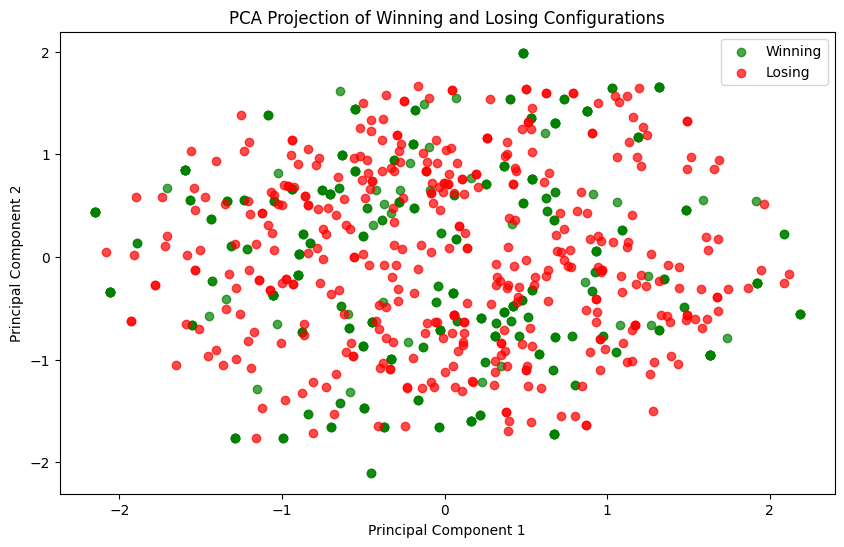

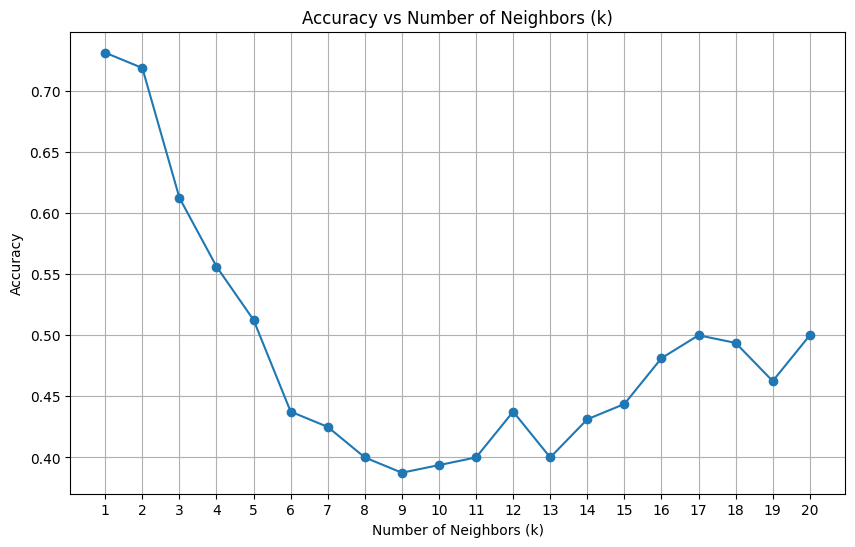

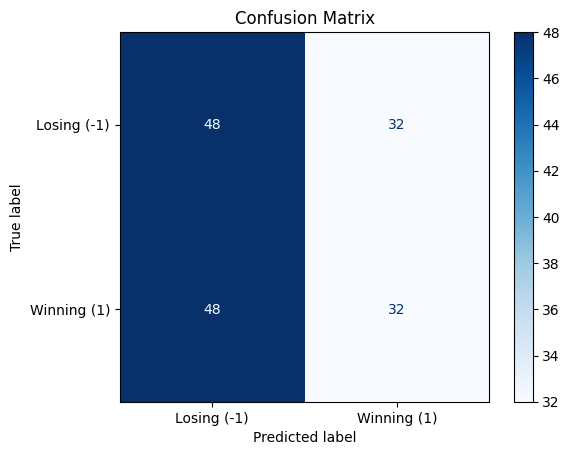


Evaluation of Example Configuration:
[1, 0, 0]
[2, 1, 2]
[0, 2, 1]
Winning Position (White's perspective)


In [ ]:

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Fonction pour charger les configurations depuis un fichier CSV
def load_configurations_from_csv(filename):
    configs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        current_config = []
        for row in reader:
            if row:  # Si la ligne n'est pas vide
                current_config.append(list(map(int, row)))
            else:  # Ligne vide indique la fin d'une configuration
                if current_config:
                    configs.append(current_config)
                    current_config = []
        # Ajouter la dernière configuration si le fichier ne se termine pas par une ligne vide
        if current_config:
            configs.append(current_config)
    return configs

# Charger les configurations gagnantes et perdantes
winning_configs = load_configurations_from_csv('winning_configs_white.csv')
losing_configs = load_configurations_from_csv('losing_configs_white.csv')

# Convertir les configurations en vecteurs (features) et attribuer les étiquettes
def prepare_data(configs, label):
    features = []
    labels = []
    for config in configs:
        # Aplatir la matrice 3x3 en un vecteur de 9 éléments
        features.append([cell for row in config for cell in row])
        labels.append(label)
    return features, labels

# Préparer les données pour les configurations gagnantes et perdantes
X_win, y_win = prepare_data(winning_configs, 1)  # Étiquette 1 pour les configurations gagnantes
X_lose, y_lose = prepare_data(losing_configs, -1)  # Étiquette -1 pour les configurations perdantes

# Combiner les données gagnantes et perdantes
X = X_win + X_lose
y = y_win + y_lose

# Convertir les listes en tableaux NumPy
X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Trouver le meilleur nombre de voisins (k) avec GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors (k): {best_k}")

# Créer et entraîner un modèle KNN avec le meilleur k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Losing (-1)', 'Winning (1)'])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

# 2. Synthetic Data Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='green', label='Winning', alpha=0.7)
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], c='red', label='Losing', alpha=0.7)
plt.title("PCA Projection of Winning and Losing Configurations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 3. Accuracy vs k Plot
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Losing (-1)', 'Winning (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Fonction pour évaluer une nouvelle configuration
def evaluate_configuration(config):
    # Aplatir la matrice 3x3 en un vecteur de 9 éléments
    features = np.array([cell for row in config for cell in row]).reshape(1, -1)
    prediction = model.predict(features)
    if prediction == 1:
        return "Winning Position (White's perspective)"
    elif prediction == -1:
        return "Losing Position (White's perspective)"
    else:
        return "Unknown"

# Exemple d'évaluation d'une configuration
example_config = [
    [1, 0, 0],
    [2, 1, 2],
    [0, 2, 1]
]

result = evaluate_configuration(example_config)
print("\nEvaluation of Example Configuration:")
for row in example_config:
    print(row)
print(result)

# Comparaison des 2 model

Decision Tree Results:
Accuracy: 86.25%

Classification Report:
              precision    recall  f1-score   support

 Losing (-1)       0.90      0.81      0.86        80
 Winning (1)       0.83      0.91      0.87        80

    accuracy                           0.86       160
   macro avg       0.87      0.86      0.86       160
weighted avg       0.87      0.86      0.86       160


Best number of neighbors (k) for KNN: 1

K-Nearest Neighbors Results:
Accuracy: 73.12%

Classification Report:
              precision    recall  f1-score   support

 Losing (-1)       0.85      0.56      0.68        80
 Winning (1)       0.67      0.90      0.77        80

    accuracy                           0.73       160
   macro avg       0.76      0.73      0.72       160
weighted avg       0.76      0.73      0.72       160



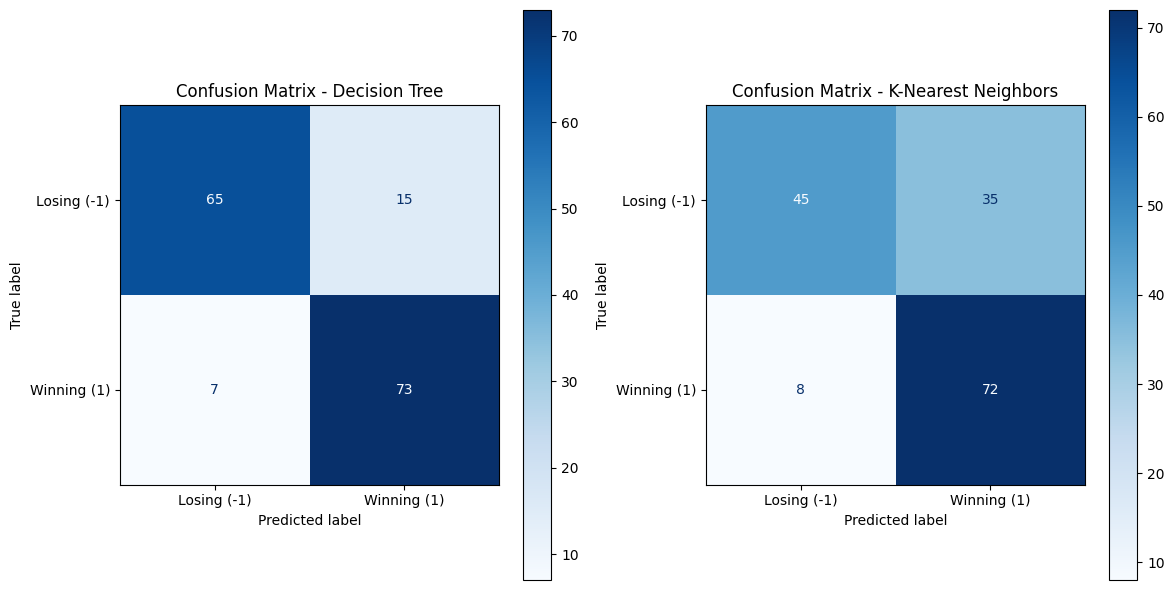

<ipython-input-11-1df82c3b855d>:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


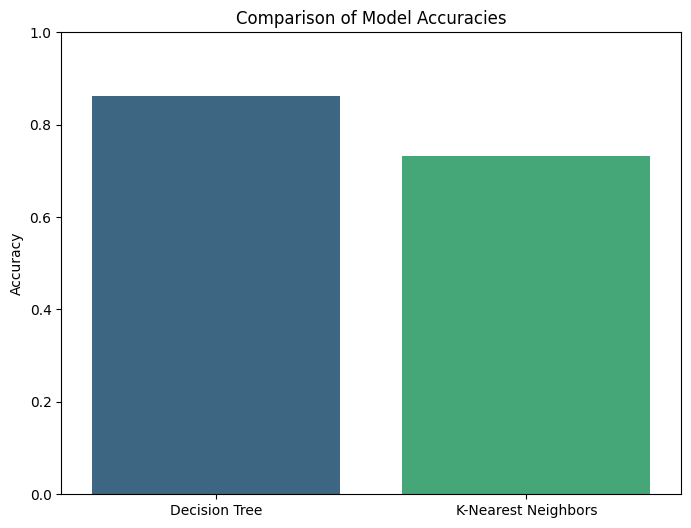

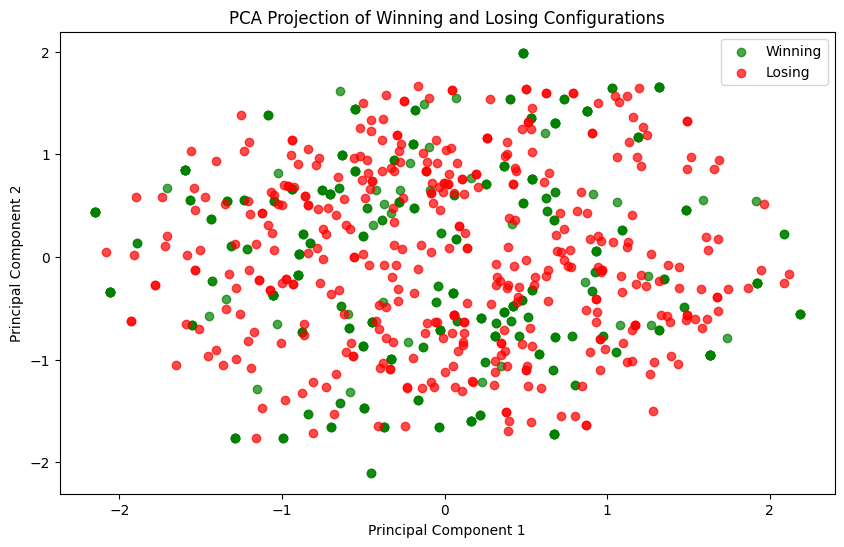

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Fonction pour charger les configurations depuis un fichier CSV
def load_configurations_from_csv(filename):
    configs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        current_config = []
        for row in reader:
            if row:  # Si la ligne n'est pas vide
                current_config.append(list(map(int, row)))
            else:  # Ligne vide indique la fin d'une configuration
                if current_config:
                    configs.append(current_config)
                    current_config = []
        # Ajouter la dernière configuration si le fichier ne se termine pas par une ligne vide
        if current_config:
            configs.append(current_config)
    return configs

# Charger les configurations gagnantes et perdantes
winning_configs = load_configurations_from_csv('winning_configs_white.csv')
losing_configs = load_configurations_from_csv('losing_configs_white.csv')

# Convertir les configurations en vecteurs (features) et attribuer les étiquettes
def prepare_data(configs, label):
    features = []
    labels = []
    for config in configs:
        # Aplatir la matrice 3x3 en un vecteur de 9 éléments
        features.append([cell for row in config for cell in row])
        labels.append(label)
    return features, labels

# Préparer les données pour les configurations gagnantes et perdantes
X_win, y_win = prepare_data(winning_configs, 1)  # Étiquette 1 pour les configurations gagnantes
X_lose, y_lose = prepare_data(losing_configs, -1)  # Étiquette -1 pour les configurations perdantes

# Combiner les données gagnantes et perdantes
X = X_win + X_lose
y = y_win + y_lose

# Convertir les listes en tableaux NumPy
X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# Partie 1 : Modèle Decision Tree
# -----------------------------------
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Prédiction avec Decision Tree
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=['Losing (-1)', 'Winning (1)'])

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print("\nClassification Report:")
print(report_dt)

# Matrice de confusion pour Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Losing (-1)', 'Winning (1)'])

# -----------------------------------
# Partie 2 : Modèle K-Nearest Neighbors (KNN)
# -----------------------------------
# Trouver le meilleur nombre de voisins (k) avec GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_k = grid_search_knn.best_params_['n_neighbors']
print(f"\nBest number of neighbors (k) for KNN: {best_k}")

# Créer et entraîner un modèle KNN avec le meilleur k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Prédiction avec KNN
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, target_names=['Losing (-1)', 'Winning (1)'])

print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("\nClassification Report:")
print(report_knn)

# Matrice de confusion pour KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Losing (-1)', 'Winning (1)'])

# -----------------------------------
# Partie 3 : Comparaison des modèles
# -----------------------------------

# Afficher les matrices de confusion côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matrice de confusion pour Decision Tree
disp_dt.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title("Confusion Matrix - Decision Tree")

# Matrice de confusion pour KNN
disp_knn.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title("Confusion Matrix - K-Nearest Neighbors")

plt.tight_layout()
plt.show()

# Comparaison des accuracies
models = ['Decision Tree', 'K-Nearest Neighbors']
accuracies = [accuracy_dt, accuracy_knn]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# -----------------------------------
# Partie 4 : Synthetic Data Visualization (PCA)
# -----------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='green', label='Winning', alpha=0.7)
plt.scatter(X_pca[y == -1, 0], X_pca[y == -1, 1], c='red', label='Losing', alpha=0.7)
plt.title("PCA Projection of Winning and Losing Configurations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Amélioration


Accuracy: 83.75%

Classification Report:
              precision    recall  f1-score   support

 Losing (-1)       0.83      0.27      0.41        88
  Almost (0)       0.81      0.98      0.89       312
 Winning (1)       0.97      0.90      0.94        80

    accuracy                           0.84       480
   macro avg       0.87      0.72      0.74       480
weighted avg       0.84      0.84      0.81       480



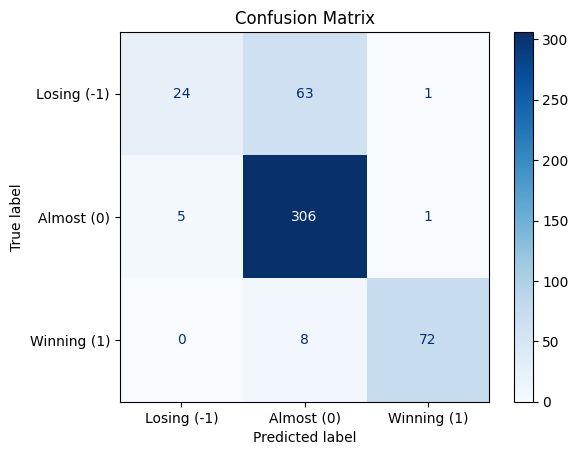


Evaluation of Example Configuration:
[1, 1, 0]
[2, 0, 2]
[0, 2, 1]
Losing Position (White's perspective)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Fonction pour charger les configurations depuis un fichier CSV
def load_configurations_from_csv(filename):
    configs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        current_config = []
        for row in reader:
            if row:  # Si la ligne n'est pas vide
                current_config.append(list(map(int, row)))
            else:  # Ligne vide indique la fin d'une configuration
                if current_config:
                    configs.append(current_config)
                    current_config = []
        # Ajouter la dernière configuration si le fichier ne se termine pas par une ligne vide
        if current_config:
            configs.append(current_config)
    return configs

# Charger les configurations gagnantes et perdantes
winning_configs = load_configurations_from_csv('winning_configs_white.csv')
losing_configs = load_configurations_from_csv('losing_configs_white.csv')

# Générer des configurations "presque gagnantes" ou "presque perdantes"
def generate_almost_winning_losing(configs, label, almost_label):
    almost_configs = []
    labels = []
    for config in configs:
        for _ in range(2):  # Générer 2 configurations presque similaires par configuration
            new_config = [row[:] for row in config]
            # Changer aléatoirement une cellule pour rendre la position "presque"
            while True:
                row, col = np.random.randint(0, 3), np.random.randint(0, 3)
                if new_config[row][col] != 0:  # Ne pas modifier une case vide
                    new_config[row][col] = 0  # Effacer une pièce
                    break
            almost_configs.append(new_config)
            labels.append(almost_label)  # Attribuer une étiquette différente (ex. 0 pour "presque")
    return almost_configs, labels

# Générer des configurations presque gagnantes et presque perdantes
almost_winning_configs, almost_winning_labels = generate_almost_winning_losing(winning_configs, 1, 0)
almost_losing_configs, almost_losing_labels = generate_almost_winning_losing(losing_configs, -1, 0)

# Convertir les configurations en vecteurs (features) et attribuer les étiquettes
def prepare_data(configs, labels):
    features = []
    for config in configs:
        # Aplatir la matrice 3x3 en un vecteur de 9 éléments
        features.append([cell for row in config for cell in row])
    return features, labels

# Préparer les données pour toutes les configurations
X_win, y_win = prepare_data(winning_configs, [1] * len(winning_configs))  # Étiquette 1 pour gagnant
X_lose, y_lose = prepare_data(losing_configs, [-1] * len(losing_configs))  # Étiquette -1 pour perdant
X_almost_win, y_almost_win = prepare_data(almost_winning_configs, almost_winning_labels)  # Étiquette 0 pour presque gagnant
X_almost_lose, y_almost_lose = prepare_data(almost_losing_configs, almost_losing_labels)  # Étiquette 0 pour presque perdant

# Combiner toutes les données
X = X_win + X_lose + X_almost_win + X_almost_lose
y = y_win + y_lose + y_almost_win + y_almost_lose

# Convertir les listes en tableaux NumPy
X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Losing (-1)', 'Almost (0)', 'Winning (1)'])

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Losing (-1)', 'Almost (0)', 'Winning (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Fonction pour évaluer une nouvelle configuration
def evaluate_configuration(config):
    # Aplatir la matrice 3x3 en un vecteur de 9 éléments
    features = np.array([cell for row in config for cell in row]).reshape(1, -1)
    prediction = model.predict(features)
    if prediction == 1:
        return "Winning Position (White's perspective)"
    elif prediction == -1:
        return "Losing Position (White's perspective)"
    elif prediction == 0:
        return "Almost Winning or Losing Position"
    else:
        return "Unknown"

# Exemple d'évaluation d'une configuration
example_config = [
    [1, 1, 0],
    [2, 0, 2],
    [0, 2, 1]
]

result = evaluate_configuration(example_config)
print("\nEvaluation of Example Configuration:")
for row in example_config:
    print(row)
print(result)